<div class="alert alert-success">
<h3><center>" Diagnosa Gangguan Hati Menggunakan Jaringan Saraf Tiruan"<center> </h2>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;: ASRI SAFMI</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>NIM &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; : 09011181722002</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK 5B</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>JURUSAN &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: SISTEM KOMPUTER 17</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : PRAKTIKUM_KECERDASAN BUATAN</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>DOSEN PENGAMPUH: Prof. Dr. Ir. Siti Nurmaini, M.T.</strong></h3>
</li>
</ul>
</div>

<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong>Dibawah ini adalah daftar-daftar Modul yang akan digunakan :</strong>
<ul>
<li style="text-align: left;">
    <strong>Numpy =</strong> Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks. Pada program ini numpy digunakan untuk generate array untuk membuat grafik confusion matriks
</li> 
</ul>

<ul>
<li style="text-align: left;">
<strong>Pandas =</strong> Modul ini akan digunakan untuk Load Dataset, karena pandas lebih baik untuk load data dengan skala besar
</li>
</ul>
  
<ul>
<li style="text-align: left;">
<strong>Matplotlib =</strong> Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix, grafik akurasi, dll.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Seaborn =</strong> Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Sklearn =</strong> Modul ini adalah salah satu modul utama yang digunakan untuk mengolah data Machine Learning seperti preprocessing, dan lainnya
</li>
</ul>

<ul>
<li style="text-align: left;">
<strong>Keras =</strong> Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network
</li>
</ul>


<div>

In [224]:
from sklearn.utils import resample
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling1D
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-success">
<h3><strong>Load Data dari Dataset Liver Disorders</strong></h3>
</ul>
</div>

Link dataset Liver Disorders : https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/

Link jurnal: https://www.researchgate.net/publication/318468361_Liver_Disease_Diagnosis_Based_on_Neural_Networks&prev=search

In [225]:
liver = pd.read_csv("ini_liver_disorders.csv")

In [226]:
len(liver)

345

<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Berikut adalah spesifikasi dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 6 variabel yaitu : mcv, alkphos, sgpt, gammagt, drinks
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel (Selector), dengan 2 kondisi, yaitu 1 dan 2
</li>
</ul>
    
<div>

In [227]:
liver.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


<div class="alert alert-success"> 
    <font size="3"><p align="justify">head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

In [228]:
liver.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [229]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
mcv         345 non-null int64
alkphos     345 non-null int64
sgpt        345 non-null int64
sgot        345 non-null int64
gammagt     345 non-null int64
drinks      345 non-null float64
selector    345 non-null int64
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


<div class="alert alert-success">
 <font size="3"><p align="justify">Pada NN ini terdapat 2 output : 
<ul>
<li style="text-align: left;">
    no_disorders = kondisi saat NN menetapkan bahwa tidak ada tanda-tanda gangguan hati, nilai yang di ambil adalah pada Variabel "Selector" dengan nilai 2 yang ada pada dataset
</li> 
</ul>

<ul>
<li style="text-align: left;">
disorders = kondisi saat NN menetapkan bahwa ada tanda-tanda gangguan hati, nilai yang di ambil adalah pada Variabel "Selector" dengan nilai 1 yang ada pada dataset</h4>
</li>
</ul>
    
<div>

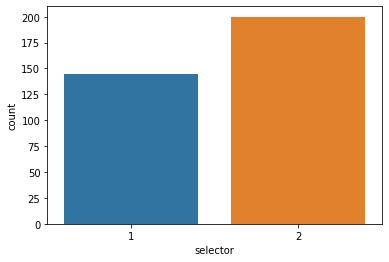

In [230]:
disorder = liver[liver.selector==1]
no_disorder = liver[liver.selector==2]
sns.countplot(x=liver["selector"])

<div class="alert alert-success">
 <font size="3"><p align="justify">Pada code di bawah ini, nilai untuk disorders di tambah datanya. Resample ini digunakan karena agar data yang unbalanced, maksudnya output 1 dan Output 2 jumlahnya terlalu ekstrim sehingga datanya menjadi tidak seimbang seperti yang terlihat pada grafik di atas

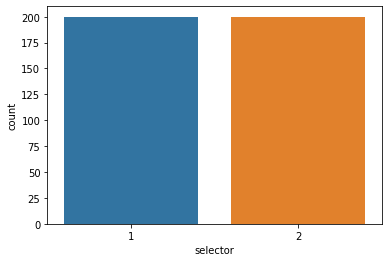

In [231]:
from sklearn.utils import resample
disorder_upsample = resample(disorder, replace=True,n_samples=200,random_state=123)
liver_resampled = pd.concat([no_disorder, disorder_upsample])
sns.countplot(x=liver_resampled['selector'],data=liver)

<div class="alert alert-success">
 <font size="3"><p align="justify">Pada grafik di atas menunjukkan antara data class 1 dan 2 sudah cukup seimbang dibandingkan data yang sebelumnya sehingga data ini akan lebih mudah untuk di proses

<div class="alert alert-success"><strong>HISTOGRAM</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

<font size="3"><p align="justify">hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

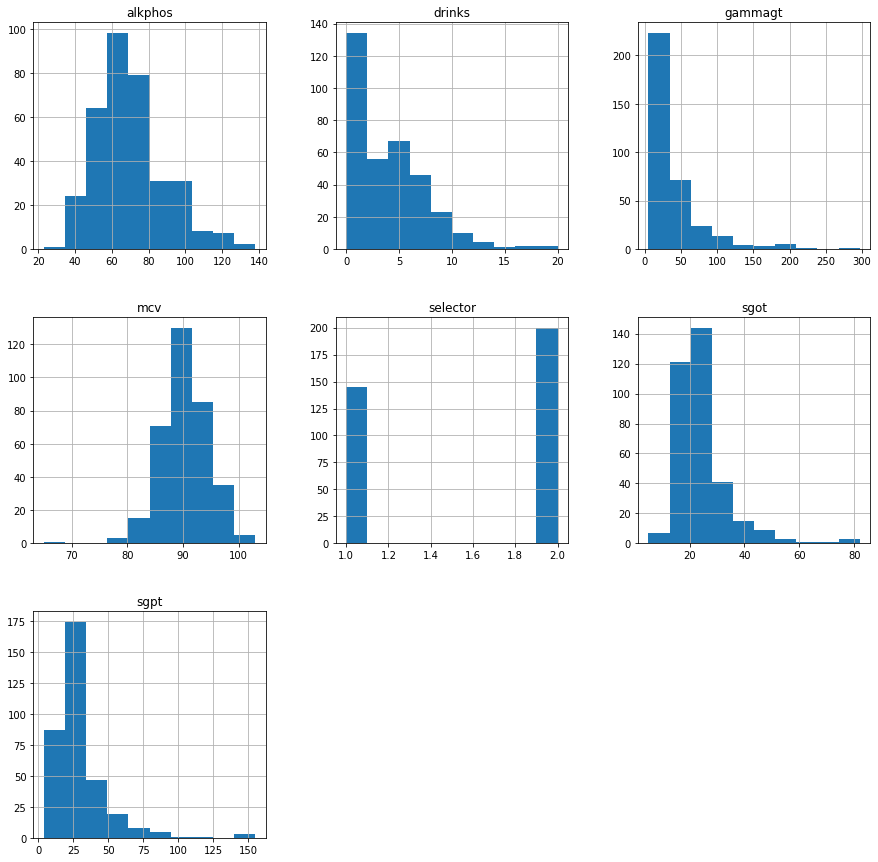

In [232]:
liver.hist(figsize=(15,15))
plt.show()

<div class="alert alert-success"><strong>BOXPLOT</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Boxplot berfungsi sebagai penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral dan ukuran penyebaran data pengamatan. 

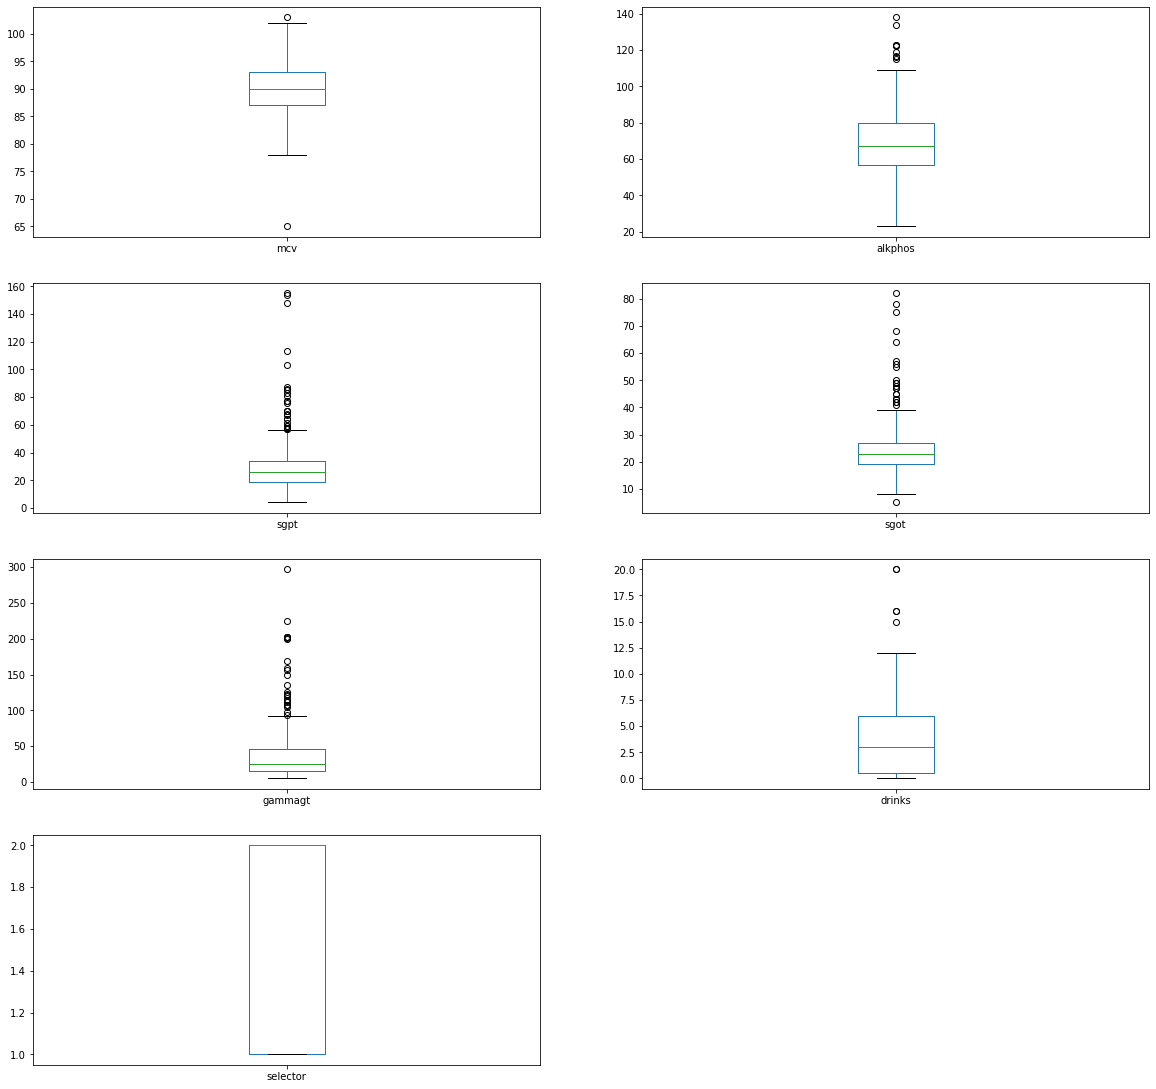

In [233]:
liver.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(20,55))
plt.show()

<div class="alert alert-success">
<h3><strong>Load Data dari Dataset Liver Disorders</strong></h3>
</ul>
</div>
<div class="alert alert-success">
 <font size="3"><p align="justify">Mengambil 6 data input dan meletakannya ke dalam variable X sebagai input dan Y sebagai output

In [234]:
dataset = np.loadtxt("liver-disorders.txt", delimiter=",")
X = dataset[:,0:6]
Y = dataset[:,6]
X = np.array(X)
Y = np.array(Y)

<div class="alert alert-success">
 <font size="3"><p align="justify">StandardScaler adalah
Modul preprocessing lebih lanjut menyediakan kelas utilitas StandardScaler yang mengimplementasikan Transformer API untuk menghitung rata-rata dan standar deviasi pada satu set pelatihan sehingga nantinya dapat menerapkan kembali transformasi yang sama pada set pengujian.

In [235]:
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X)

<div class="alert alert-success">
 <font size="3"><p align="justify">Mengambil 6 variabel untuk nilai X sebagai input dan nilai Y sebagai ouput ada 2 jenis

In [236]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(345, 6)

In [237]:
from keras.utils.np_utils import to_categorical
Y_categorical = to_categorical(Y)

Y_categorical.shape

(345, 2)

In [238]:
X

array([[85., 92., 45., 27., 31.,  0.],
       [85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

In [239]:
Y

array([0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

<div class="alert alert-success"><strong>SEQUENTIAL MODEL</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

In [240]:
model = Sequential()

<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Pada Model yang saya buat terdapat beberapa layer yaitu :</strong>
<ul>
<li style="text-align: left;">
    LAYER INPUT : Pada Layer Input terdapat 6 jenis nilai yang diambil dari dataset Liver Disorders.
</li> 
</ul>

<ul>
<li style="text-align: left;">
    HIDDEN LAYER: Pada model terdapat satu Hidden Layer yang memiliki neuron sebanyak 200
</li>
</ul>

<ul>
<li style="text-align: left;">
   OUTPUT LAYER: Pada Layer Output terdapat 2 nilai yang dihasilkan yaitu 1 dan 2
</li>
</ul>
   
<div>

In [241]:
model.add (Dense(units=200, input_dim = 6, activation='relu'))
model.add (Dropout(0.15))

<div class="alert alert-success">
<h3>Codingan di atas adalah untuk menentukan jumlah input dan neuron dari Neural Network </h3>
<ul>
<li style="text-align: left;">
    <h4><b>Dense 200 = Neural Network pada layer pertama terdiri dari 200 neuron</h4></b>
</li> 
</ul>

<ul>
<li style="text-align: left;">
<h4>Relu = Merupakan fungsi aktivasi yang digunakan pada layer ini</h4>
</li>
</ul>

<ul>
<li style="text-align: left;">
<h4>Input dim 6 = Berdasarkan dataset yang dipakai, terdiri dari 7 kategori. 6 kategori input, dan 1 kategori output</h4>
</li>
</ul>
    
<div>

In [242]:
model.add (Dense(units=2, activation='softmax'))

<div class="alert alert-success">
<h3>Codingan di atas adalah untuk layer output dari Neural Network</h3>
<ul>
<li style="text-align: left;">
    <h4><b>Dense 2 = Neural Network yang saya buat pada layer terakhir ini terdiri dari 2 neuron, neuron inilah yang akan menghasilkan output berdasarkan dataset yang ada dan memprediksi apakah terdapat gangguan hati atau tidak</h4></b>
</li> 
</ul>

<ul>
<li style="text-align: left;">
<h4>Sigmoid = Merupakan fungsi aktivasi yang digunakan pada layer ini</h4>
</li>
</ul>
    
<div>

In [243]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               1400      
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 402       
Total params: 1,802
Trainable params: 1,802
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Sigmoid Activation</strong>
 <font size="3"><p align="justify"> 
Fungsi sigmoid adalah fungsi aktivasi berkelanjutan dan smooth yang paling umum. Ini juga disebut fungsi logistik dan memiliki bentuk 1 / (1 + exp (-x)).

In [244]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

<div class="alert alert-success">
 <font size="3">Epoch = adalah ketika seluruh dataset sudah melalui proses training pada Neural Netwok sampai dikembalikan ke awal untuk sekali putaran (backpropagation)
    <br>Batch Size 12 = adalah jumlah sampel data yang disebarkan ke Neural Network. Jadi dataset akan dibagi menjadi 12 bagian untuk memudahkan index pada saat pelatihan.
    <br>Validation Split 0.4 = Adalah ukuran data yang akan digunakan untuk testing dan training, data training sebesar 0,6 atau 60%, dan data testing sebesar 0,4 atau 40%.

In [245]:
history = model.fit(X_scaled, Y_categorical, validation_split=0.15, epochs = 200, batch_size =10)

Train on 293 samples, validate on 52 samples
Epoch 1/200
293/293 [==============================] - 1s 4ms/step - loss: 0.6861 - accuracy: 0.5631 - val_loss: 0.6841 - val_accuracy: 0.5769
Epoch 2/200
293/293 [==============================] - 0s 534us/step - loss: 0.6815 - accuracy: 0.5802 - val_loss: 0.6816 - val_accuracy: 0.5769
Epoch 3/200
293/293 [==============================] - 0s 579us/step - loss: 0.6796 - accuracy: 0.5802 - val_loss: 0.6788 - val_accuracy: 0.5769
Epoch 4/200
293/293 [==============================] - 0s 546us/step - loss: 0.6698 - accuracy: 0.5802 - val_loss: 0.6762 - val_accuracy: 0.5769
Epoch 5/200
293/293 [==============================] - 0s 467us/step - loss: 0.6642 - accuracy: 0.5802 - val_loss: 0.6753 - val_accuracy: 0.5769
Epoch 6/200
293/293 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5802 - val_loss: 0.6761 - val_accuracy: 0.5769
Epoch 7/200
293/293 [==============================] - 0s 505us/step - loss: 0.6658 - acc

In [246]:
predict = model.predict(X_scaled)
predict

array([[6.04080677e-01, 3.95919293e-01],
       [6.63323700e-01, 3.36676270e-01],
       [2.87858427e-01, 7.12141573e-01],
       [5.56915224e-01, 4.43084776e-01],
       [2.77351856e-01, 7.22648144e-01],
       [1.88805759e-01, 8.11194241e-01],
       [8.15392375e-01, 1.84607670e-01],
       [9.33806419e-01, 6.61936030e-02],
       [8.15086007e-01, 1.84913993e-01],
       [9.41058636e-01, 5.89413531e-02],
       [8.09820071e-02, 9.19018030e-01],
       [4.19901907e-01, 5.80098152e-01],
       [9.62966144e-01, 3.70338075e-02],
       [7.90217876e-01, 2.09782124e-01],
       [9.59406912e-01, 4.05930951e-02],
       [3.70440990e-01, 6.29558980e-01],
       [9.18772817e-01, 8.12271535e-02],
       [7.41449654e-01, 2.58550256e-01],
       [4.69049335e-01, 5.30950665e-01],
       [6.98507309e-01, 3.01492661e-01],
       [9.69570637e-01, 3.04293036e-02],
       [7.30105281e-01, 2.69894749e-01],
       [7.23689258e-01, 2.76310712e-01],
       [4.65942383e-01, 5.34057617e-01],
       [1.467842

In [247]:
scores = model.evaluate(X_scaled,Y_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

345/345 [==============================] - 0s 339us/step

accuracy: 79.71%


In [248]:
print(scores[1])

0.7971014380455017


In [249]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [250]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_categorical.argmax(axis=1), predict.argmax(axis=1))

In [251]:
cm

array([[111,  34],
       [ 36, 164]], dtype=int64)

<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Conclution Matrix : </strong>
<ul> TP | FP
<ul> FN | TN
</ul>
   
<div>

<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Berikut adalah rumus untuk mencari akurasi, recall, TNR dan Presisi berdasarkan Confusion Matrix :</strong>
<ul>
<li style="text-align: left;">
    Akurasi = TP+TN / TP + FP + FN + TN
</li> 
</ul>

<ul>
<li style="text-align: left;">
    Recall  = TP / FN + TP
</li>
</ul>

<ul>
<li style="text-align: left;">
   Presisi = TP / FP + TP
</li>
</ul>

<ul>
<li style="text-align: left;">
   TNR     = FP / TN + FP
</li>
</ul>
   
<div>

<div class="alert alert-success"><strong>ACCURACY</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai akurasinya adalah sebagai berikut :

In [252]:
akurasi = ((101+170) / (101+44+30+170))*100
akurasi

78.55072463768116

<div class="alert alert-success"><strong>PRECISSION</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai presisinya adalah sebagai berikut :

In [253]:
presisi = (101/(44+101))*100
presisi

69.6551724137931

<div class="alert alert-success"><strong>RECALL</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai recallnya adalah sebagai berikut :

In [254]:
recall = (101/(30+101))*100
recall

77.09923664122137

<div class="alert alert-success"><strong>TRUE NEGATIF RATE</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai TNRnya adalah sebagai berikut :

In [255]:
TNR = (44/(170+44))
TNR

0.205607476635514

In [256]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1 )

<Figure size 432x288 with 0 Axes>

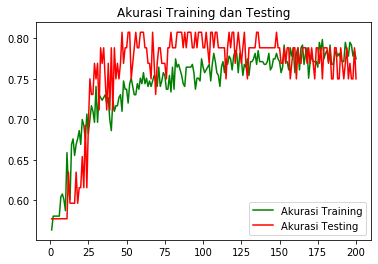

<Figure size 432x288 with 0 Axes>

In [257]:
plt.plot(epochs, acc, 'g' , color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', color='red', label='Akurasi Testing')
plt.title('Akurasi Training dan Testing')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

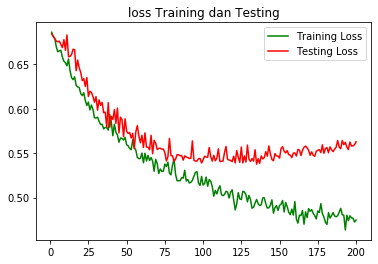

<Figure size 432x288 with 0 Axes>

In [258]:
plt.plot(epochs, loss, 'g' , color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'r', color='red', label='Testing Loss')
plt.title('loss Training dan Testing')
plt.legend()
plt.figure()